# Data Exploration

**Description**: https://www.kaggle.com/c/instacart-market-basket-analysis

**Goal**: Predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, Instacart provides between 4 and 100 of their orders, with the sequence of products purchased in each order. Instacart also provides the week and hour of day the order was placed, and a relative measure of time between orders.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colors, cm

%matplotlib inline

In [2]:
# 'Blues', 'BuGn', 'gray', 'prism', 'summer', 'GnBu', 'Greens', 'OrRd', 'Oranges', 'Pastel1', 'PuBu', 'YlGn', 'binary'
c1 = cm.get_cmap('Pastel1')

#current_palette = sns.color_palette("hls", 7)
current_palette = 'pastel'
sns.set_palette(current_palette)
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale = 1.5)

In [3]:
# Each entity has an associated unique id.
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

# Which products were purchased in each order
# 'reordered' indicates that the customer has a previous order that contains the product. 
# Note that some orders will have no reordered items. 
# You may predict an explicit 'None' value for orders with no reordered items. 
order_products__prior = pd.read_csv('order_products__prior.csv') # contains previous order contents for all customers
order_products__train = pd.read_csv('order_products__train.csv')

# Which set (prior, train, test) an order belongs. 
# Predict reordered items only for the test set orders. 
orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
print aisles.shape, departments.shape, order_products__prior.shape, order_products__train.shape, orders.shape, products.shape

(134, 2) (21, 2) (32434489, 4) (1384617, 4) (3421083, 7) (49688, 4)


In [5]:
aisles.head(1)

,aisle_id,aisle
0,1,prepared soups salads


In [6]:
departments.head(1)

,department_id,department
0,1,frozen


In [7]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00


In [8]:
products.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [9]:
order_products__prior.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1


In [10]:
order_products__train.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1


In [11]:
prior_df = order_products__prior.copy()
prior_df = pd.merge(prior_df, orders, on='order_id', how='left')
prior_df = pd.merge(prior_df, products, on='product_id', how='left')
prior_df = pd.merge(prior_df, departments, on='department_id', how='left')
prior_df = pd.merge(prior_df, aisles, on='aisle_id', how='left')
prior_df.shape 

(32434489, 15)

In [12]:
train_df = order_products__train.copy()
train_df = pd.merge(train_df, orders, on='order_id', how='left')
train_df = pd.merge(train_df, products, on='product_id', how='left')
train_df = pd.merge(train_df, departments, on='department_id', how='left')
train_df = pd.merge(train_df, aisles, on='aisle_id', how='left')
train_df.shape

(1384617, 15)

In [13]:
prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.00,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.00,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.00,Garlic Powder,104,13,pantry,spices seasonings


In [14]:
train_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.00,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,1,11109,2,1,112108,train,4,4,10,9.00,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses
2,1,10246,3,0,112108,train,4,4,10,9.00,Organic Celery Hearts,83,4,produce,fresh vegetables


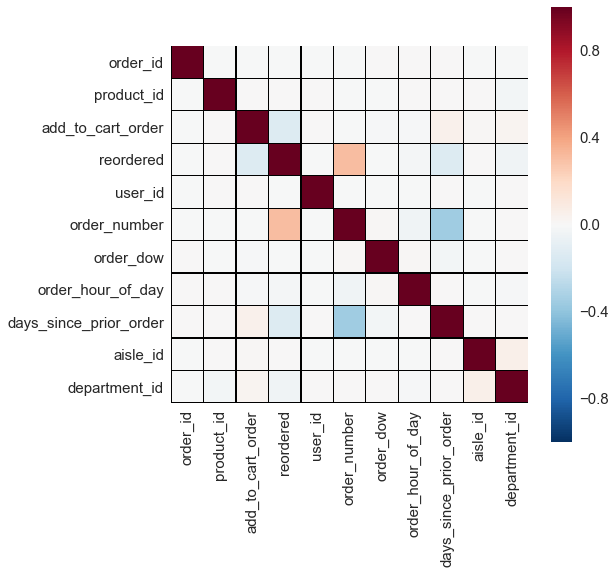

In [15]:
# Pearson Correlation Matrix
sns.heatmap(prior_df.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black').figure.set_size_inches(8,8)

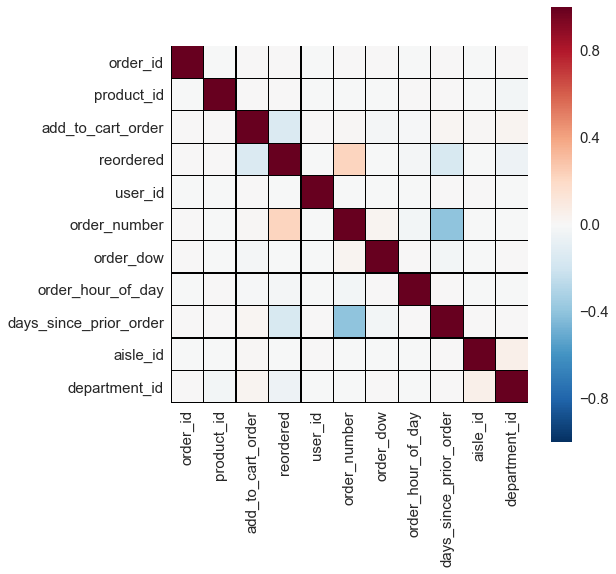

In [16]:
sns.heatmap(train_df.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black').figure.set_size_inches(8,8)

### Products

In [17]:
product_info = pd.merge(pd.merge(products, departments, on ='department_id', how = 'left'), aisles, on='aisle_id', how = 'left')
product_info.head(3)

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea


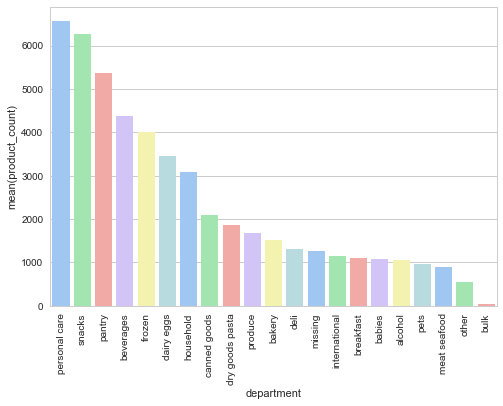

In [18]:
# products in each departments
dept_cnt = product_info.groupby('department').product_id.aggregate(['count'])\
          .rename(columns={'count': 'product_count'}).reset_index()\
          .sort_values('product_count', ascending = False)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='department', y='product_count', data=dept_cnt, palette=current_palette)
plt.xticks(rotation=90)
plt.show()

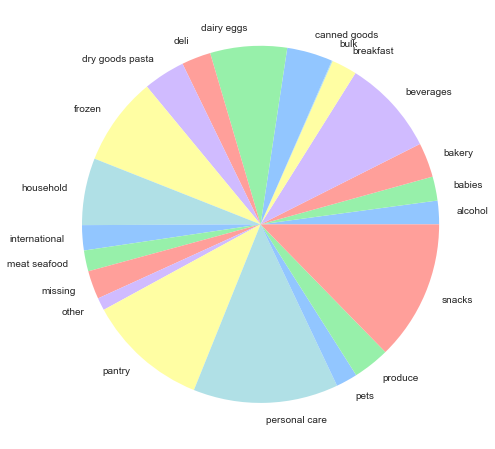

In [19]:
sums = product_info.product_id.groupby(product_info.department).sum()

# my_norm = colors.Normalize(min(sums),max(sums))
# cs = c1(my_norm(sums))

cs = sns.color_palette("pastel", 21).as_hex()

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.pie(sums, labels=sums.index, colors=cs);

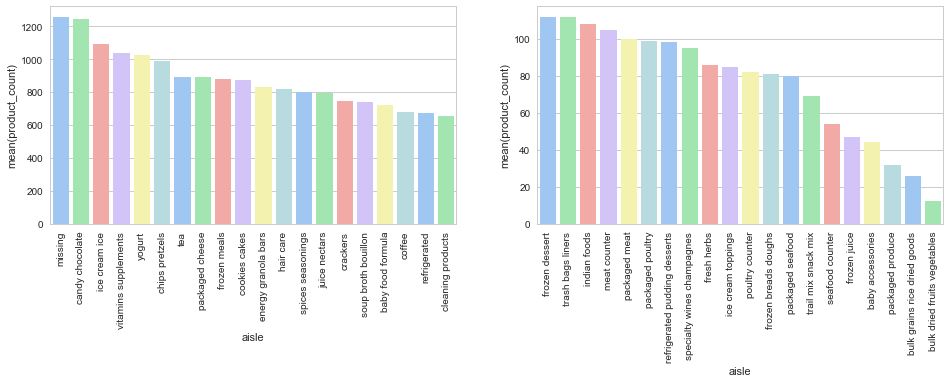

In [20]:
# products in each asile
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

aisle_cnt = product_info.groupby('aisle').product_id.aggregate(['count'])\
            .rename(columns={'count': 'product_count'}).reset_index()\
            .sort_values('product_count', ascending = False)
        
sns.set(style="whitegrid", color_codes=True)    
p1 = sns.barplot(x='aisle', y='product_count', data=aisle_cnt[:20], palette=current_palette, ax=axes[0])
p1.set_xticklabels(aisle_cnt.aisle[:20], rotation=90)
p2 = sns.barplot(x='aisle', y='product_count', data=aisle_cnt[len(aisle_cnt)-20:], palette=current_palette, ax=axes[1])
p2.set_xticklabels(aisle_cnt.aisle[len(aisle_cnt)-20:], rotation=90)
plt.show()

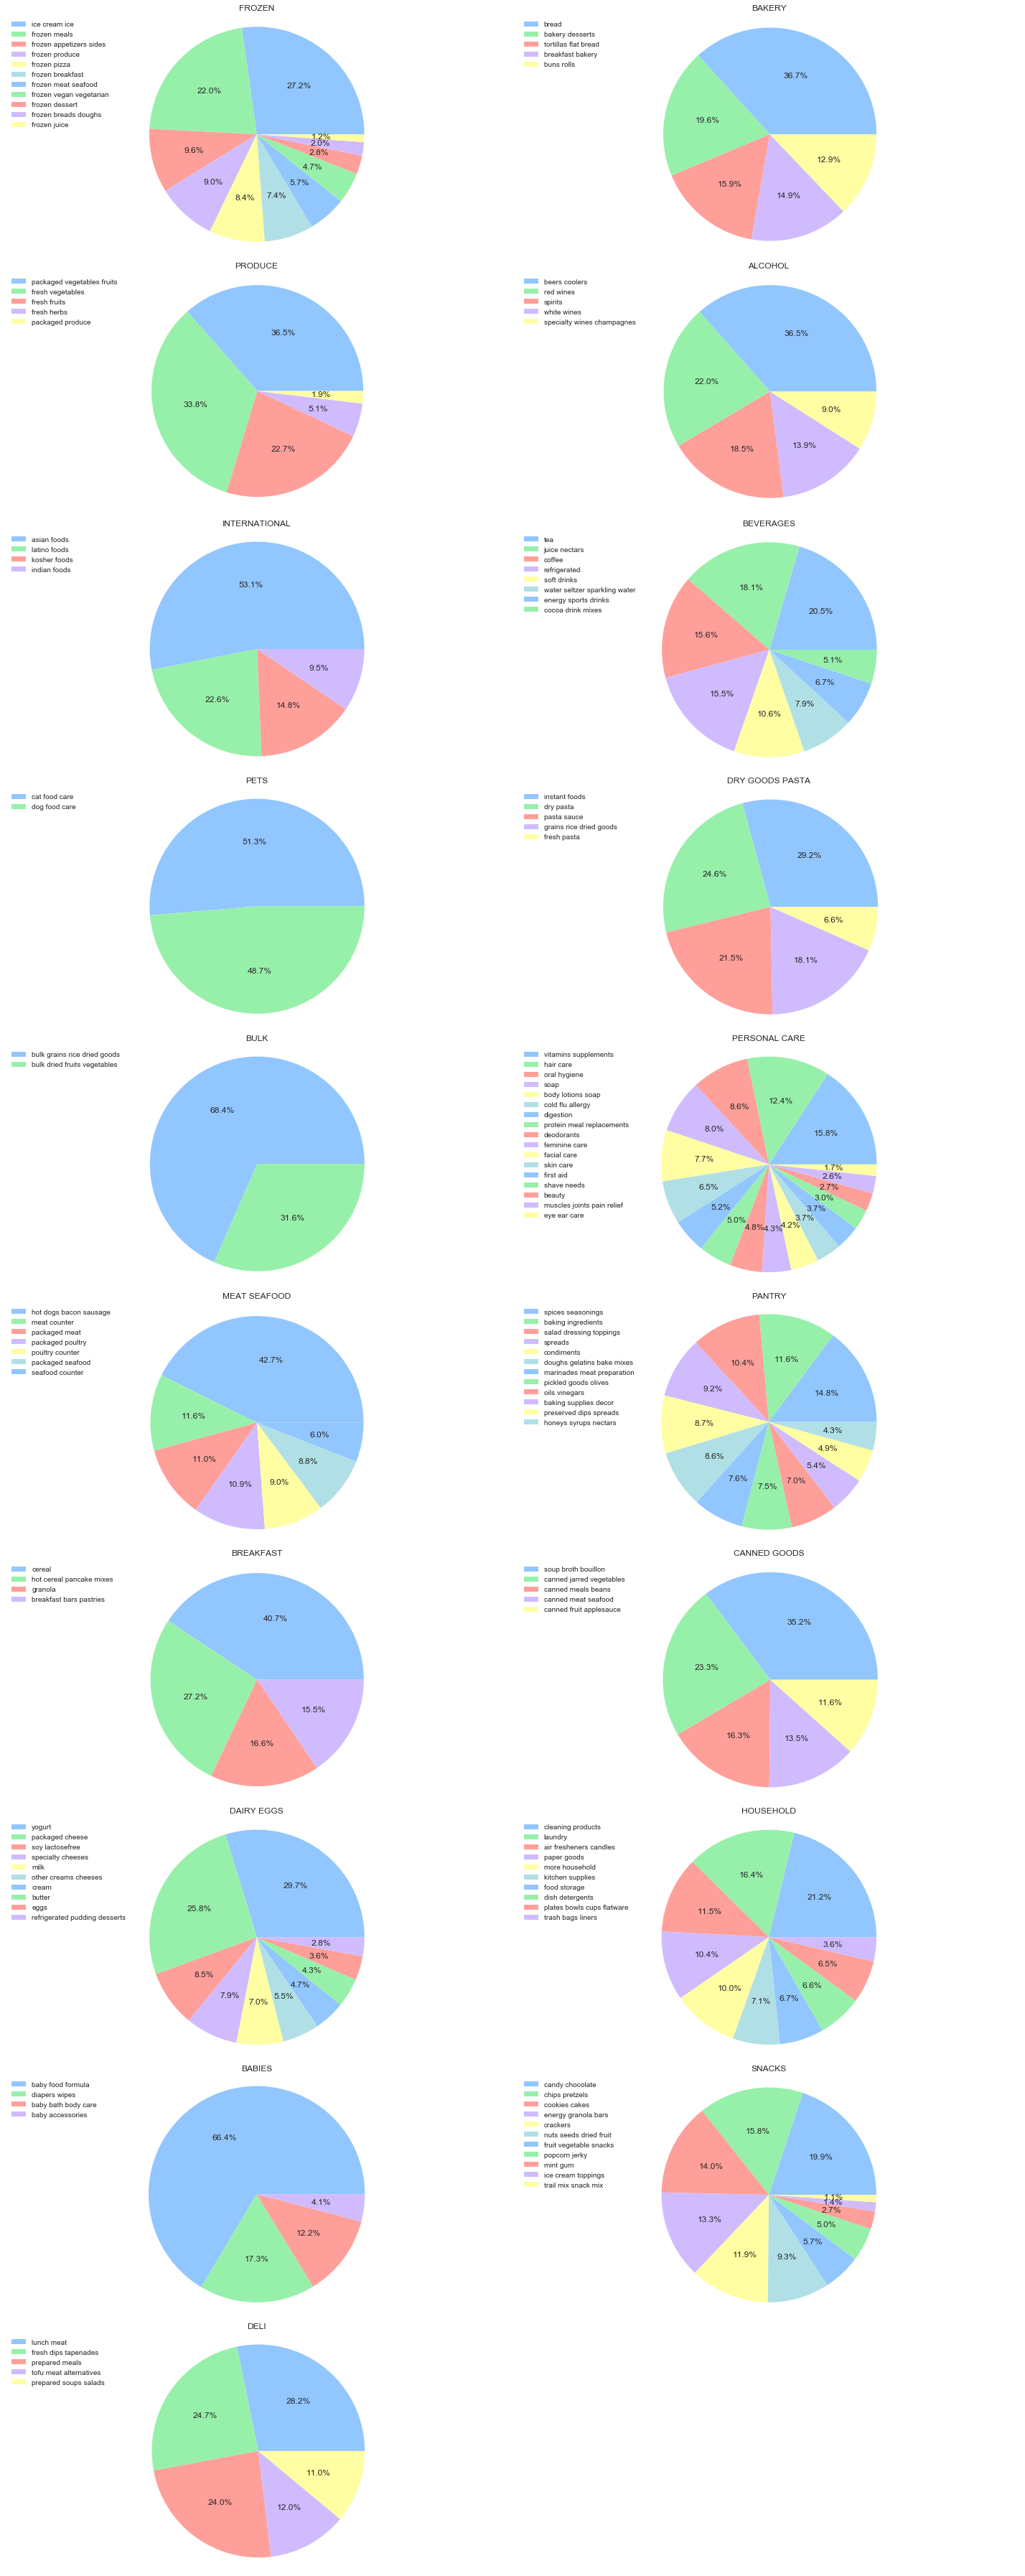

In [21]:
# product count for each aisle by department

dept_aisle_cnt = product_info.groupby(['department','aisle']).product_id.aggregate(['count'])\
                .rename(columns={'count': 'product_count'}).reset_index()\
                .sort_values(['department','product_count'], ascending = False)
        
# cs = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
        
plt.figure(figsize=(20, 50))
i = 1
for x in departments.department[0:1].tolist() + departments.department[2:20].tolist(): # missing and other are skipped
    plt.subplot(10,2,i)
    dept_cnt = dept_aisle_cnt.loc[dept_aisle_cnt['department'] == x]

    plt.pie(dept_cnt.product_count, autopct='%1.1f%%', colors=cs)
    plt.title(x.upper())
    plt.axis('equal')
    plt.legend(labels=dept_cnt.aisle, loc='upper left')

    i += 1
plt.tight_layout()

### Orders

In [22]:
orders.groupby('eval_set').order_id.count().reset_index()

,eval_set,order_id
0,prior,3214874
1,test,75000
2,train,131209


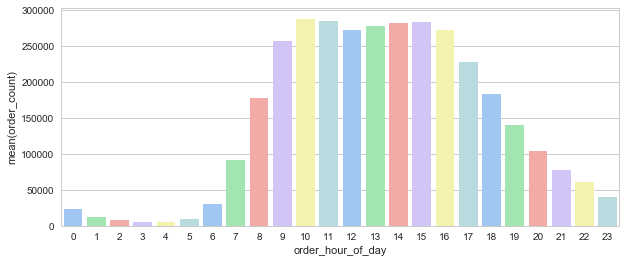

In [23]:
hod = orders.groupby('order_hour_of_day').order_id.agg(['count']).rename(columns={'count': 'order_count'}).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='order_hour_of_day', y='order_count', data = hod, palette=current_palette)
plt.show()

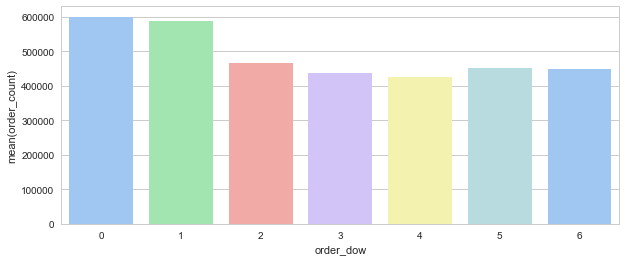

In [24]:
dow = orders.groupby('order_dow').order_id.agg(['count']).rename(columns={'count': 'order_count'}).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='order_dow', y='order_count', data = dow, palette=current_palette)
plt.show()